<a href="https://colab.research.google.com/github/vinitakawale/Imbalanced-Data/blob/main/Imbalanced_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from imblearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegressionCV
from sklearn.feature_selection import VarianceThreshold



# Step 1: Downloading dataset from open ML repository

In [ ]:
data = fetch_openml("mammography", as_frame=True)

X, y = data["data"], data["target"]

print("Value counts", y.value_counts())
print("Shape", X.shape)








/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Value counts -1    10923
1       260
Name: class, dtype: int64
Shape (11183, 6)


# Step 2: Split Data into development and test sets

In [ ]:
X_dev, X_test, y_dev, y_test = train_test_split(data.data, data.target == '1', stratify=data.target, test_size=0.2, random_state=42)

#Observe imbalance in the ratio
y_dev.value_counts(normalize=True)
y_test.value_counts(normalize=True)





False    0.976755
True     0.023245
Name: class, dtype: float64

# Training Classifiers
comparing scores for various classifiers on the imbalanced dataset before we apply balancing techniques


In [ ]:
# Logistic Regression

scores = cross_validate(LogisticRegression(), X_dev, y_dev, cv=10, scoring=["roc_auc", "average_precision"]);
scores["test_roc_auc"].mean(), scores["test_average_precision"].mean()

(0.9047435182719985, 0.6045937994904842)

In [ ]:

# Random Forest

scores = cross_validate(RandomForestClassifier(), X_dev, y_dev, cv=10, scoring=["roc_auc", "average_precision"])
scores["test_roc_auc"].mean(), scores["test_average_precision"].mean()



(0.9368089090074155, 0.7324034320661028)

# Applying balancing techniques
we will apply various balancing strategies and observe the scores on the imbalanced and balanced datasets

# Technique 1: Random Undersampling

In [ ]:
# Comparing Logistic Regression before and after Random Undersampling

rus = RandomUnderSampler(replacement=False, random_state=42)
sample_pipe = make_pipeline(rus, LogisticRegression())

scores = cross_validate(sample_pipe, X_dev, y_dev, cv=10, scoring=["roc_auc", "average_precision"])
scores["test_roc_auc"].mean(), scores["test_average_precision"].mean()








NameError: ignored

# Technique 2: Random Oversampling

In [ ]:

ros = RandomOverSampler()
X_dev_ros, y_dev_ros = ros.fit_resample(X_dev, y_dev)

print(X_dev.shape)
print(X_dev_ros.shape)
y_dev_ros.value_counts(normalize=True)











(8946, 6)
(17476, 6)


False    0.5
True     0.5
Name: class, dtype: float64

In [ ]:
y_dev_ros.value_counts()

False    8738
True     8738
Name: class, dtype: int64

In [ ]:
# Comparing Logistic Regression before and after Random Oversampling

ros = RandomOverSampler()
sample_pipe = make_pipeline(ros, LogisticRegression())

scores = cross_validate(sample_pipe, X_dev, y_dev, cv=10, scoring=["roc_auc", "average_precision"])
scores["test_roc_auc"].mean(), scores["test_average_precision"].mean()




(0.9120348759305503, 0.5275420679117414)

In [ ]:
# Comparing Random Forest Classifier before and after Random Oversampling

ros = RandomOverSampler()
sample_pipe = make_pipeline(ros, RandomForestClassifier())

scores = cross_validate(sample_pipe, X_dev, y_dev, cv=10, scoring=["roc_auc", "average_precision"])
scores["test_roc_auc"].mean(), scores["test_average_precision"].mean()


(0.9097648754836941, 0.6962260457620322)

# 3. Ensemble Resampling

In [ ]:
#Bagging

rus = RandomUnderSampler(replacement=False, random_state=42)
tree = DecisionTreeClassifier(max_features="auto", random_state=42)
under_sampling_bagging = make_pipeline(rus, BaggingClassifier(base_estimator=tree,random_state=42))

scores = cross_validate(under_sampling_bagging, X_dev, y_dev, cv=10, scoring=["roc_auc", "average_precision"])
scores["test_roc_auc"].mean(), scores["test_average_precision"].mean()








/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

(0.938411825919198, 0.458717954029249)

In [ ]:
#Random Forest

rus = RandomUnderSampler(replacement=False, random_state=42)
rf_under_sampling = make_pipeline(rus, RandomForestClassifier(random_state=42))

scores = cross_validate(rf_under_sampling, X_dev, y_dev, cv=10, scoring=["roc_auc", "average_precision"])
scores["test_roc_auc"].mean(), scores["test_average_precision"].mean()

(0.9430329687084388, 0.6189073324753069)

# Syntheic Minority Oversampling Technique (SMOTE)

In [ ]:
# Oversampling for Logistic Regression

ros = RandomOverSampler(random_state=42)
oversamplig_pipe = make_pipeline(ros, LogisticRegression())
scores = cross_validate(oversamplig_pipe, X_dev, y_dev, cv=10, scoring=["roc_auc", "average_precision"])
scores["test_roc_auc"].mean(), scores["test_average_precision"].mean()


(0.9130371409810945, 0.528769916053271)

In [ ]:
#SMOTE for LogisticRegression
smote = SMOTE(random_state=42)
smote_pipe = make_pipeline(smote, LogisticRegression())
scores = cross_validate(smote_pipe, X_dev, y_dev, cv=10, scoring=["roc_auc", "average_precision"])
scores["test_roc_auc"].mean(), scores["test_average_precision"].mean()




(0.9140841600178045, 0.5180001398437423)

In [ ]:
# Oversampling for RandomForestClassifier

ros = RandomOverSampler(random_state=42)
oversamplig_pipe = make_pipeline(ros, RandomForestClassifier())
scores = cross_validate(oversamplig_pipe, X_dev, y_dev, cv=10, scoring=["roc_auc", "average_precision"])
scores["test_roc_auc"].mean(), scores["test_average_precision"].mean()

(0.9189493440134525, 0.7016341981496843)

In [ ]:
#SMOTE for RandomForestClassifier

smote = SMOTE(random_state=42)
smote_pipe = make_pipeline(smote, RandomForestClassifier())
scores = cross_validate(smote_pipe, X_dev, y_dev, cv=10, scoring=["roc_auc", "average_precision"])
scores["test_roc_auc"].mean(), scores["test_average_precision"].mean()

(0.9140841600178045, 0.5180001398437423)

<Axes: xlabel='param_smote__k_neighbors'>

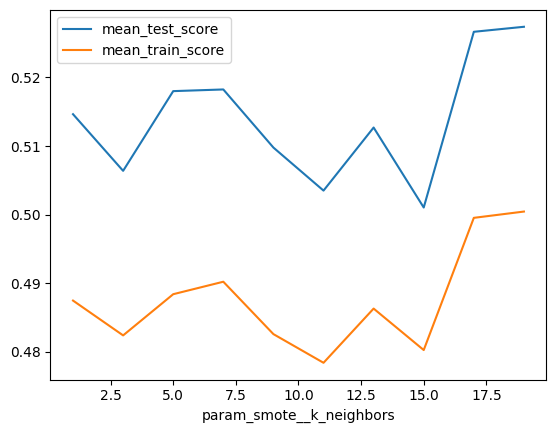

In [ ]:
param_grid = {'smote__k_neighbors': np.arange(1,20, 2)}
gs = GridSearchCV(smote_pipe, param_grid, cv=10, scoring="average_precision", return_train_score=True )
gs.fit(X_dev, y_dev)
results = pd.DataFrame(gs.cv_results_)
results.plot('param_smote__k_neighbors', ['mean_test_score', 'mean_train_score'])





# Adding Class Weights

In [ ]:
# Logistic Regression
scores = cross_validate(LogisticRegressionCV(), X_dev, y_dev, cv=10, scoring=["roc_auc", "average_precision"])
scores["test_roc_auc"].mean(), scores["test_average_precision"].mean()




(0.9046980053787539, 0.6063330397221185)

In [ ]:
#adding class weights
scores = cross_validate(LogisticRegressionCV(class_weight="balanced"), X_dev, y_dev, cv=10, scoring=["roc_auc", "average_precision"])
scores["test_roc_auc"].mean(), scores["test_average_precision"].mean()

(0.9067232200664517, 0.5724649513533766)

In [ ]:
#Random Forest
scores = cross_validate(RandomForestClassifier(), X_dev, y_dev, cv=10, scoring=["roc_auc", "average_precision"])
scores["test_roc_auc"].mean(), scores["test_average_precision"].mean()


(0.9363260693568675, 0.7228247903498367)

In [ ]:
#adding class weights
scores = cross_validate(RandomForestClassifier(class_weight="balanced"), X_dev, y_dev, cv=10, scoring=["roc_auc", "average_precision"])
scores["test_roc_auc"].mean(), scores["test_average_precision"].mean()



(0.9128968617507212, 0.6959791363311798)

# Learning Sparse Data

In [ ]:
# Variance based filtering
var_thresholds = [1e-5, 5e-5, 1e-4, 5e-4, 1e-3,]
dev_scores = []
test_scores =[]
n_features = []
for threshold in var_thresholds:
    pipe = make_pipeline(VarianceThreshold(threshold), LogisticRegression())
    pipe.fit(X_dev, y_dev)
    n_features.append(len(pipe.named_steps["variancethreshold"].get_support(indices=True)))
    dev_scores.append(pipe.score(X_dev, y_dev))
    test_scores.append(pipe.score(X_test, y_test))



